<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter02ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
class Preceptron:
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta=eta
    self.n_iter=n_iter
    self.random_state=random_state

  def fit(self, x, y):
    rgen=np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01,
                        size=x.shape[1])
    self.b_ = np.float64(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(x, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update !=0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, x):
    return np.dot(x, self.w_) + self.b_

  def predict(self, x):
    return np.where(self.net_input(x) >= 0.0, 1, 0)

In [113]:
v1 = np.array([1,2,3])

In [114]:
v2 = 0.5*v1

In [115]:
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

np.float64(0.0)

In [116]:
import os
import pandas as pd

In [117]:
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From url',s)

From url https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [118]:
df=pd.read_csv(s,header=None, encoding='utf-8')

In [119]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [120]:
import matplotlib.pyplot as plt
import numpy as np

In [121]:
y=df.iloc[0:100, 4].values
y=np.where(y == 'Iris-setosa',0, 1)
x=df.iloc[0:100,[0,2]].values

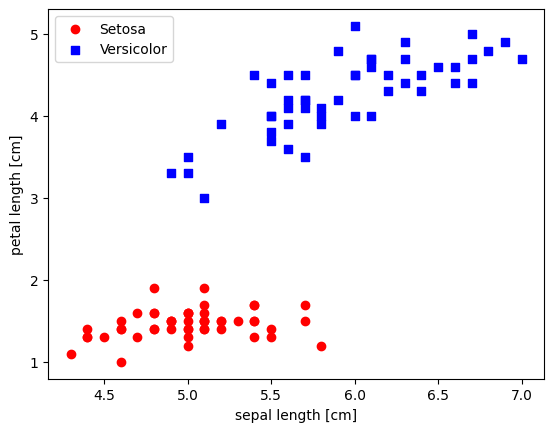

In [122]:
plt.scatter(x[:50, 0] ,x[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(x[50:100,0], x[50:100,1],
            color='blue',marker='s', label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

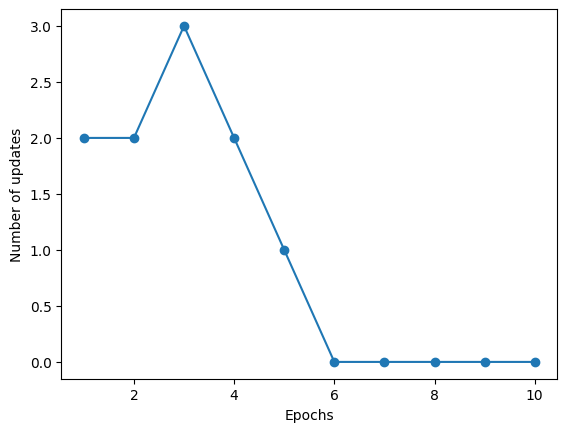

In [123]:
ppn=Preceptron(eta=0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [124]:
from matplotlib.colors import  ListedColormap

In [125]:
def plot_decision_regions(x,y, classifier, resolution=0.02):
  markers=('o','s','^','v', '<')
  colors = ('red', 'blue','lightgreen','gray','cyan')
  cmap= ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab= lab.reshape(xx1.shape)

  plt.contourf(xx1, xx2, lab, aplpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0],
                y=x[y== cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')
